In [2]:
import sys, os
sys.path.append(f'../../code')
path_to_json = os.getcwd()

In [3]:
import json
def load_case(path):
    with open(path, 'r+') as file: return json.load(file)

json_files_mc = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('mc-hT')], 
                       reverse = True)
json_files_alg1 = sorted([pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json') and pos_json.startswith('alg1-hT')],
                         reverse = True)
import datetime
date_string = datetime.date.today().strftime("%Y-%m-%d")
#take the last-simulation file
for file_name_mc, file_name_alg1 in zip(json_files_mc, json_files_alg1):
    date = file_name_mc[6:len(file_name_mc) - 5] #the date is the same for the two for how run.py is constructed
    if date_string == date:
        file_to_load_mc = file_name_mc
        file_to_load_alg1 = file_name_alg1
    else:
        file_to_load_mc = json_files_mc[0]
        file_to_load_alg1 = json_files_alg1[0]

mc = load_case(file_to_load_mc)
alg1 = load_case(file_to_load_alg1)



Generating theoretical configurations: 8it [00:00, ?it/s]


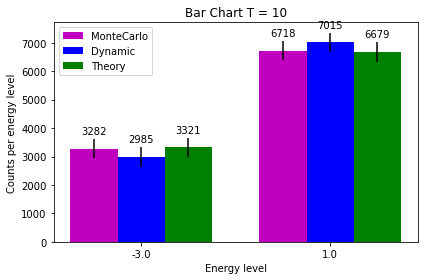

In [4]:
import ising
from ising import *
import matplotlib.pyplot as plt

mc_m_counts = count_variables(mc["magnetization_sample"])
alg1_m_counts = count_variables(alg1["magnetization_sample"])
mc_engy_counts = count_variables(mc["energy_sample"])
alg1_engy_counts = count_variables(alg1["energy_sample"])

chain = Chain(size=alg1["number of spins"], temperature = alg1["temperature"])
n_samples = len(alg1["energy_sample"])
theory_engy, theory_m, theory_engy_counts, binomial_avg, binomial_std = theoretical_quantities(chain, n_samples=n_samples)

multiplicity_mc, std_mc, mc_engy_counts = std_algorithms(mc_engy_counts, binomial_avg, theory_engy,
                                                                                          binomial_std)
multiplicity_alg1, std_alg1, alg1_engy_counts = std_algorithms(alg1_engy_counts, binomial_avg, theory_engy, binomial_std)

fig, ax = plt.subplots()
labels = mc_engy_counts.keys()
x = np.arange(len(labels)) 
width = 0.25
rects1 = ax.bar(x, list(mc_engy_counts.values()), width, yerr=std_mc, align='center',
                label='MonteCarlo', color='m')
rects2 = ax.bar(x + width, list(alg1_engy_counts.values()), width, yerr=std_alg1, align='center',
                label='Dynamic', color='b')
theory_engy_counts_adjusted = [round(counts) for counts in theory_engy_counts]
rects3 = ax.bar(x + width * 2, theory_engy_counts_adjusted, width, yerr=binomial_std, align='center',
                label='Theory', color='g')

ax.set_title('Bar Chart T = 10')
ax.set_ylabel('Counts per energy level')
ax.set_xlabel('Energy level')
ax.set_xticks(x + width)
ax.set_xticklabels([i for i in labels])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
fig.tight_layout()

Text(0.5, 1.0, 'M Correlation MonteCarlo')

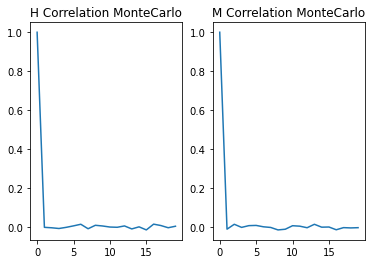

In [6]:
mc_engy_corr = acrl(mc["energy_sample"], len(mc["energy_sample"]))
mc_m_corr = acrl(mc["magnetization_sample"], len(mc["magnetization_sample"]))
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(mc_engy_corr[:20])
axes[0].set_title("H Correlation MonteCarlo")
axes[1].plot(mc_m_corr[:20])
axes[1].set_title("M Correlation MonteCarlo")

Text(0.5, 1.0, 'M Correlation Alg1')

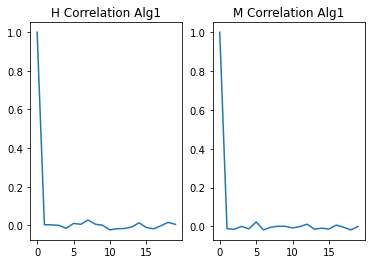

In [8]:
alg1_engy_corr = acrl(alg1["energy_sample"], len(alg1["energy_sample"]))
alg1_m_corr = acrl(alg1["magnetization_sample"], len(alg1["magnetization_sample"]))
fig_kde, axes = plt.subplots(1, 2)
axes[0].plot(alg1_engy_corr[:20])
axes[0].set_title("H Correlation Alg1")
axes[1].plot(alg1_m_corr[:20])
axes[1].set_title("M Correlation Alg1")

In [9]:
#H0: the sample goes like the theoretical one
print(f'pvalue one-sample mc:',gof(f_obs=list(mc_engy_counts.values()), f_exp=theory_engy_counts))
print(f'pvalue one-sample alg1:',gof(f_obs=list(alg1_engy_counts.values()), f_exp=theory_engy_counts))

pvalue one-sample mc: 0.5961819660890223
pvalue one-sample alg1: 0.9999999999997974


In [10]:
#H0: the two samples came from the same distribution
print(f'pvalue two-sample energy:', two_sample_chi2test(mc_engy_counts, alg1_engy_counts, n_samples_a=len(mc["energy_sample"]), 
                                                        n_samples_b=len(alg1["energy_sample"])))

print(f'pvalue two-sample magnetization:', two_sample_chi2test(mc_m_counts, alg1_m_counts, n_samples_a=len(mc["magnetization_sample"]), 
                                                               n_samples_b=len(alg1["magnetization_sample"])))

pvalue two-sample energy: 0.9999940315666914
pvalue two-sample magnetization: 0.9998712986500599
